# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [4]:
# Your code here

#CREO QUE LA COLUMNA QUE INTENTAREMOS PREDECIR ES LA VARIABLE TYPE, QUE NO DICE SI ES UN SITIO BENIGNO O MALIGNO.
#SEGÚN YO NO HAY QUE TRANSFORMAR NINGUNA VARIABLE, AUNQUE ESTO PUEDE CAMBIAR CONFORME HAGA EL ANÁLISIS

websites.shape

(1781, 21)

In [5]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [6]:
websites.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
URL_LENGTH,1781.0,56.961258,27.555586,16.0,39.0,49.0,68.0,249.0
NUMBER_SPECIAL_CHARACTERS,1781.0,11.111735,4.549896,5.0,8.0,10.0,13.0,43.0
CONTENT_LENGTH,969.0,11726.927761,36391.809051,0.0,324.0,1853.0,11323.0,649263.0
TCP_CONVERSATION_EXCHANGE,1781.0,16.261089,40.500975,0.0,0.0,7.0,22.0,1194.0
DIST_REMOTE_TCP_PORT,1781.0,5.472768,21.807327,0.0,0.0,0.0,5.0,708.0
REMOTE_IPS,1781.0,3.060640,3.386975,0.0,0.0,2.0,5.0,17.0
APP_BYTES,1781.0,2982.339135,56050.574748,0.0,0.0,672.0,2328.0,2362906.0
SOURCE_APP_PACKETS,1781.0,18.540146,41.627173,0.0,0.0,8.0,26.0,1198.0
REMOTE_APP_PACKETS,1781.0,18.746210,46.397969,0.0,0.0,9.0,25.0,1284.0
SOURCE_APP_BYTES,1781.0,15892.545761,69861.929888,0.0,0.0,579.0,9806.0,2060012.0


In [7]:
# Your comment here
websites.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [12]:
# Your code here

#Filtramos la martriz de correlación
websites.corr()["Type"].sort_values(ascending=False)

Type                         1.000000
NUMBER_SPECIAL_CHARACTERS    0.280897
URL_LENGTH                   0.162104
DNS_QUERY_TIMES              0.068753
REMOTE_APP_BYTES            -0.011004
APP_BYTES                   -0.011262
REMOTE_APP_PACKETS          -0.032897
APP_PACKETS                 -0.034414
SOURCE_APP_PACKETS          -0.034414
TCP_CONVERSATION_EXCHANGE   -0.040202
SOURCE_APP_BYTES            -0.043852
REMOTE_IPS                  -0.078783
DIST_REMOTE_TCP_PORT        -0.082925
CONTENT_LENGTH              -0.090852
Name: Type, dtype: float64

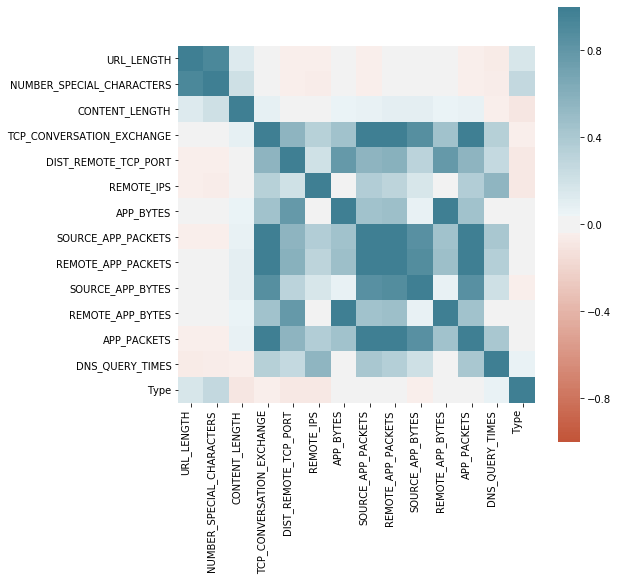

In [9]:
#creamos el heathmap
import seaborn as sns
import matplotlib.pyplot as plt

corr = websites.corr()

plt.figure(figsize=(8,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [9]:
#Para tener un listado de las correlaciones
s = corr.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

In [10]:
so.head(70)

Type                       Type                         1.000000
DNS_QUERY_TIMES            DNS_QUERY_TIMES              1.000000
NUMBER_SPECIAL_CHARACTERS  NUMBER_SPECIAL_CHARACTERS    1.000000
CONTENT_LENGTH             CONTENT_LENGTH               1.000000
TCP_CONVERSATION_EXCHANGE  TCP_CONVERSATION_EXCHANGE    1.000000
DIST_REMOTE_TCP_PORT       DIST_REMOTE_TCP_PORT         1.000000
REMOTE_IPS                 REMOTE_IPS                   1.000000
APP_BYTES                  APP_BYTES                    1.000000
SOURCE_APP_PACKETS         SOURCE_APP_PACKETS           1.000000
                           APP_PACKETS                  1.000000
REMOTE_APP_PACKETS         REMOTE_APP_PACKETS           1.000000
SOURCE_APP_BYTES           SOURCE_APP_BYTES             1.000000
REMOTE_APP_BYTES           REMOTE_APP_BYTES             1.000000
APP_PACKETS                SOURCE_APP_PACKETS           1.000000
                           APP_PACKETS                  1.000000
URL_LENGTH               

In [11]:
#Para tener la lista de correlaciones ordenadas quitando los duplicados tenemos lo siguiente:
websites.corr().unstack().sort_values(ascending=False).drop_duplicates()

#Habría entonces que quitar:
#Remote_APP_BYTES
#TCP_CONVERSATION_EXCHANGE
#REMOTE_APP_PACKETS
#DIST_REMOE_TCP_PORT

Type                       Type                         1.000000
REMOTE_APP_BYTES           APP_BYTES                    0.999992
SOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
APP_PACKETS                REMOTE_APP_PACKETS           0.989285
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
SOURCE_APP_BYTES           REMOTE_APP_PACKETS           0.880555
TCP_CONVERSATION_EXCHANGE  SOURCE_APP_BYTES             0.865580
SOURCE_APP_BYTES           APP_PACKETS                  0.857495
REMOTE_APP_BYTES           DIST_REMOTE_TCP_PORT         0.781212
APP_BYTES                  DIST_REMOTE_TCP_PORT         0.780238
REMOTE_APP_PACKETS         DIST_REMOTE_TCP_PORT         0.591188
DIST_REMOTE_TCP_PORT       APP_PACKETS                  0.558612
TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT         0.555188
REMOTE_IPS                 DNS_QUERY_TIMES              0.548189
REMOTE_APP_PACKETS       

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [13]:
# Your code here

#Pues creo que colinearidad de 90% no es la única que es alta. Yo diría que arriba de 70% es alta, pero bueeeeno....
#Quitaré las variables de tal manera que no tenga colinearidades mayores a 90%

#Empezare por retirar TCP_CONVERSATION_EXCHANGE
websites = websites.drop("TCP_CONVERSATION_EXCHANGE", axis=1)

In [14]:
websites = websites.drop("REMOTE_APP_PACKETS", axis =1)         

In [15]:
websites = websites.drop("REMOTE_APP_BYTES", axis=1)

In [16]:
websites = websites.drop("URL_LENGTH", axis=1)

In [17]:
# Your comment here
corr = websites.corr()

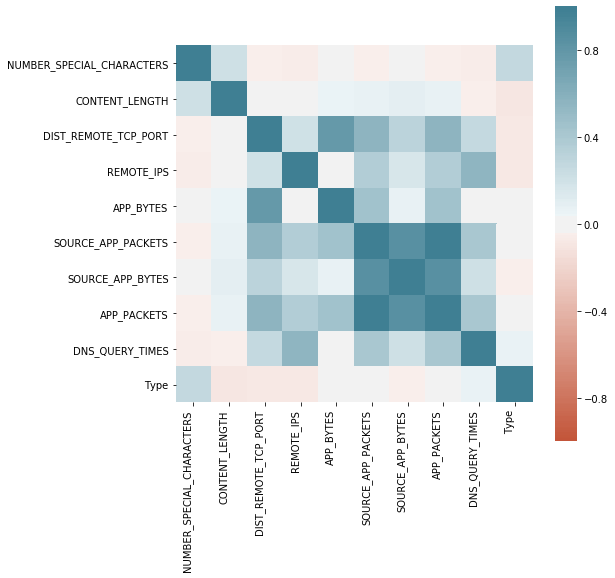

In [18]:
# Print heatmap again
plt.figure(figsize=(8,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [19]:
#Listo, ya no tenemos ninguna variable arriba del 90%
websites.corr().unstack().sort_values(ascending=False).drop_duplicates()

Type                       Type                         1.000000
APP_PACKETS                SOURCE_APP_BYTES             0.857495
APP_BYTES                  DIST_REMOTE_TCP_PORT         0.780238
DIST_REMOTE_TCP_PORT       APP_PACKETS                  0.558612
DNS_QUERY_TIMES            REMOTE_IPS                   0.548189
APP_BYTES                  SOURCE_APP_PACKETS           0.445822
APP_PACKETS                DNS_QUERY_TIMES              0.410843
REMOTE_IPS                 SOURCE_APP_PACKETS           0.361104
SOURCE_APP_BYTES           DIST_REMOTE_TCP_PORT         0.313359
NUMBER_SPECIAL_CHARACTERS  Type                         0.280897
DNS_QUERY_TIMES            DIST_REMOTE_TCP_PORT         0.259942
SOURCE_APP_BYTES           DNS_QUERY_TIMES              0.215285
NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH               0.214225
DIST_REMOTE_TCP_PORT       REMOTE_IPS                   0.210188
REMOTE_IPS                 SOURCE_APP_BYTES             0.171651
SOURCE_APP_BYTES         

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [20]:
# Your code here
websites.isnull().sum()

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [21]:
# Your code here

#Del describe() anterior nos dimos cuenta que la base tiene alrededor de 1700 obs, por lo que CONTENT_LENGTH tiene 
#casi la mitad faltante. Entonces la tiramos completamente

websites = websites.drop("CONTENT_LENGTH", axis=1)

In [22]:
# Your comment here

#Después, vemos que en SERVER y en DNS_QUERY_TIMES hay una observcion faltante, por lo que quitamos esa fila
websites= websites.dropna()

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [23]:
#verificamos que no haya ningún valor 
websites.isnull().sum()

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [24]:
# Your code here
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [26]:
#Modificamos manualmente cada valor dentro de WHOIS_COUNTRY para limpiar los errores

websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("Cyprus", "CY")
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("us", "US")
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("se", "SE")
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("r", "RU") #voy a asumir que es Russia
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("United Kingdom", "GB")
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("; u'UK'", "")
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("u", "")
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("[", "")
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("]", "")
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("'", "")
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("GB", "UK")

In [27]:
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

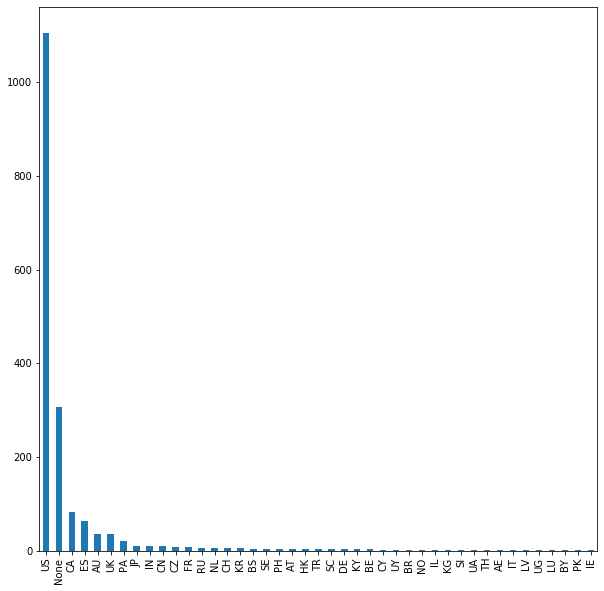

In [28]:
# Your code here

#df_tips['sex'].value_counts().plot(kind='bar');
websites.WHOIS_COUNTRY.value_counts().plot(kind="bar", figsize=((10,10)))

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [1]:
# Your code here

#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("CZ", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("FR", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("CH", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("RU", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("NL", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("KR", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("SE", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("BS", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("PH", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("AT", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("SC", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("BE", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("HK", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("CN", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("KY", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("DE", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("TR", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("CY", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("IL", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("UY", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("UA", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("BR", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("KG", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("NO", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("LV", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("PK", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("TH", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("UG", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("AE", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("IE", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("IT", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("BY", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("LU", "OTHER")
#websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.str.replace("SI", "OTHER")

In [31]:
#Una manera más corta de hacer esto podría ser hacerlo con lambda y apply

#Primero definimos una lista con los top countries
top_countries = ["US", "NONE", "CA", "ES", "UK", "AU", "PA", "JP", "IN", "CN"]

#Luego hacemos un apply y lambda
websites["WHOIS_COUNTRY"] = websites.WHOIS_COUNTRY.apply(lambda x: x if x in top_countries else "Other")

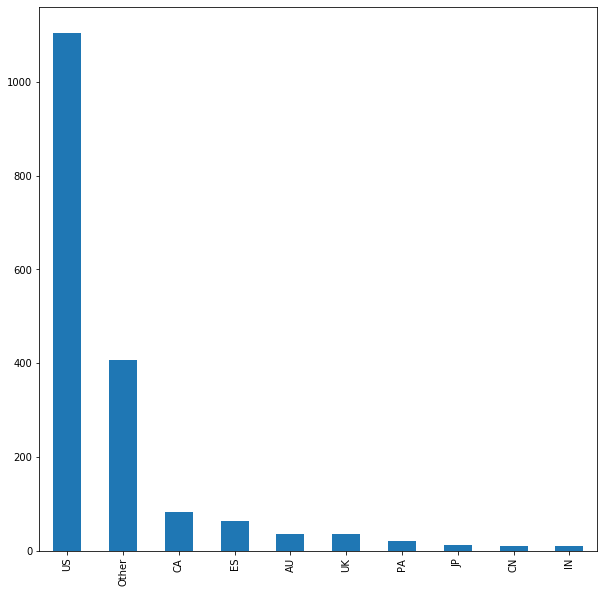

In [33]:
#Lo comprobamos con un histograma 
websites.WHOIS_COUNTRY.value_counts().plot(kind="bar", figsize=((10,10)))

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [34]:
# Your code here
websites = websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [35]:
# Your code here
websites.dtypes

URL                           object
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [36]:
# Your code here
websites = websites.drop("URL", axis=1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [37]:
# Your code here
websites.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [38]:
# Your code here
websites.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../think-hard.jpg)

In [34]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [39]:
# Your code here
websites["SERVER"] = websites.SERVER.apply(lambda x: 'Microsoft' if 'Microsoft' in x else x)
websites["SERVER"] = websites.SERVER.apply(lambda x: 'Apache' if 'Apache' in x else x)
websites["SERVER"] = websites.SERVER.apply(lambda x: 'nginx' if 'nginx' in x else x)
websites["SERVER"] = websites.SERVER.apply(lambda x: 'nginx' if 'nginx' in x else x)

In [41]:
#EJEMPLO DE CÓMO LIMPIAR 

#df['code'] = np.where((df['code'] == 'NK') & (df['items'] == 'countryName'), 'North Korea', df['code'])

websites['SERVER'] = np.where((websites['SERVER'] != 'Microsoft') & (websites['SERVER']  != 'Apache')
                              & (websites['SERVER']  != 'nginx'), 'Other', websites['SERVER'])

In [42]:
# Count `SERVER` value counts here
websites.SERVER.unique() #AHHH NO MAMES, SÍ SALIÓOOOOOOOOOO!!!!!!

array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [43]:
# Your code here
website_dummy = pd.get_dummies(data=websites[["SERVER","CHARSET","WHOIS_COUNTRY"]], drop_first=True)

In [44]:
website_dummy = pd.get_dummies(websites)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [45]:
# Your code here
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 32 columns):
NUMBER_SPECIAL_CHARACTERS    1779 non-null int64
DIST_REMOTE_TCP_PORT         1779 non-null int64
REMOTE_IPS                   1779 non-null int64
APP_BYTES                    1779 non-null int64
SOURCE_APP_PACKETS           1779 non-null int64
SOURCE_APP_BYTES             1779 non-null int64
APP_PACKETS                  1779 non-null int64
DNS_QUERY_TIMES              1779 non-null float64
Type                         1779 non-null int64
CHARSET_ISO-8859             1779 non-null uint8
CHARSET_ISO-8859-1           1779 non-null uint8
CHARSET_None                 1779 non-null uint8
CHARSET_UTF-8                1779 non-null uint8
CHARSET_iso-8859-1           1779 non-null uint8
CHARSET_us-ascii             1779 non-null uint8
CHARSET_utf-8                1779 non-null uint8
CHARSET_windows-1251         1779 non-null uint8
CHARSET_windows-1252         1779 non-null uint8
SERVER_Ap

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [46]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop('Type', axis=1)
y = website_dummy.Type

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [49]:
# Your code here:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression() #CREAMOS MACHOTE DEL MODELO

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [50]:
# Your code here:
LR.fit(X_train, y_train) #ENTRENAMOS MODELO


C:\Users\Ramiro Antonio\Anaconda3v2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [51]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

#predecimos
y_pred = LR.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(confusion)
print(acc)

[[305   3]
 [ 37  11]]
0.8876404494382022


What are your thoughts on the performance of the model? Write your conclusions below.

In [43]:
# Your conclusions here:

#Tenemos un nivel de accuracy de 87% de casos
#Hay 7 falsos positivos en type de website, 

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [54]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) #creamos machote
knn.fit(X_train, y_train) #entrenamos modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [57]:
# Your code here:
y_predict = knn.predict(X_test) #predecimos los valores para el X_test

confusion_knn = confusion_matrix(y_test, y_predict)
accuracy_knn = accuracy_score(y_test, y_predict)


In [61]:
print(f'La matriz de confusión de knn \n {confusion_knn} \n \n La precisión de knn es {accuracy_knn}')

#La matriz de confusión arroja 15 falsos positivos y 15 falsos negativos

La matriz de confusión de knn 
 [[293  15]
 [ 15  33]] 
 
 La precisión de knn es 0.9157303370786517


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [63]:
# Your code here:

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
y_predict2 = knn5.predict(X_test)

confusion_knn5 = confusion_matrix(y_test, y_predict2)
accuracy_knn5 = accuracy_score(y_test, y_predict2)

In [68]:
print(f'La matriz de confusión de knn \n {confusion_knn5} \n \n La precisión de knn es {accuracy_knn5}')

#La matriz de confusión arroja 15 falsos positivos y 15 falsos negativos

La matriz de confusión de knn 
 [[297  11]
 [ 15  33]] 
 
 La precisión de knn es 0.9269662921348315


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [47]:
# Your conclusions here:

#SÍ HAY UNA MEJORA EN LA MATRIZ DE CONFUSIÓN, PUES CON 5 VECINOS HAY SÓLO 11 FALSOS POSITIVOS (NÚMERO DE FALSOS NEGATIVOS
#ES IGUAL). LA PRECISIÓN MEJORA DE 0.915 A 0.926


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [48]:
# Your code here